In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os

import kagglehub

c:\Users\diego\Desktop\Data Science\.pgvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download the dataset

path = kagglehub.dataset_download("denkuznetz/food-delivery-time-prediction")

df = pd.read_csv(os.path.join(path, 'Food_Delivery_Times.csv'))

# Summary

In [ ]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [5]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
df[df["Traffic_Level"].isnull()].head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
85,549,10.65,Clear,NaN,Afternoon,Scooter,23,8.0,58
119,295,2.98,Foggy,NaN,Night,Bike,11,2.0,27
190,949,17.54,Clear,NaN,Morning,Car,16,8.0,54
199,79,7.49,Clear,NaN,Morning,Scooter,13,9.0,45
262,98,8.84,Clear,NaN,Morning,Bike,26,0.0,57


In [7]:
# Imputate null values

columns = ['Weather', 'Traffic_Level', 'Time_of_Day']

for item in columns:
    df[item] = df[item].fillna(df[item].mode()[0])

Text(0.5, 1.0, 'Courier Experience Distribution')

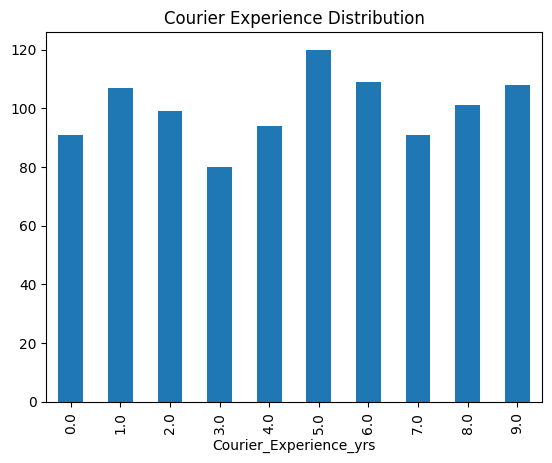

In [11]:
# Checking Column distribution

df['Courier_Experience_yrs'].value_counts().sort_index().plot(kind='bar')
plt.title('Courier Experience Distribution')

In [12]:
# For the numeric column Courier_Experience_yrs, fill missing values with median
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

# Check again
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


# Outliers

In [19]:
num_col = ['Preparation_Time_min', 'Courier_Experience_yrs', 'Distance_km', 'Delivery_Time_min']

In [ ]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers_iqr)}")

Outliers in Preparation_Time_min: 0
Outliers in Courier_Experience_yrs: 0
Outliers in Distance_km: 0
Outliers in Delivery_Time_min: 6


# Visualization

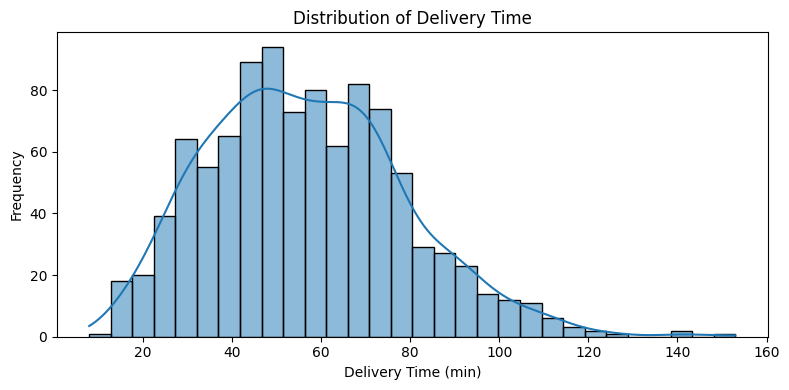

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Delivery_Time_min'], kde=True, bins=30)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

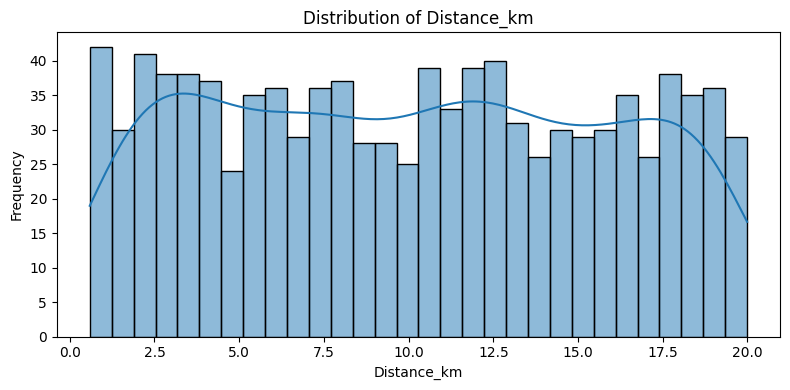

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Distance_km'], kde=True, bins=30)
plt.title('Distribution of Distance_km')
plt.xlabel('Distance_km')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

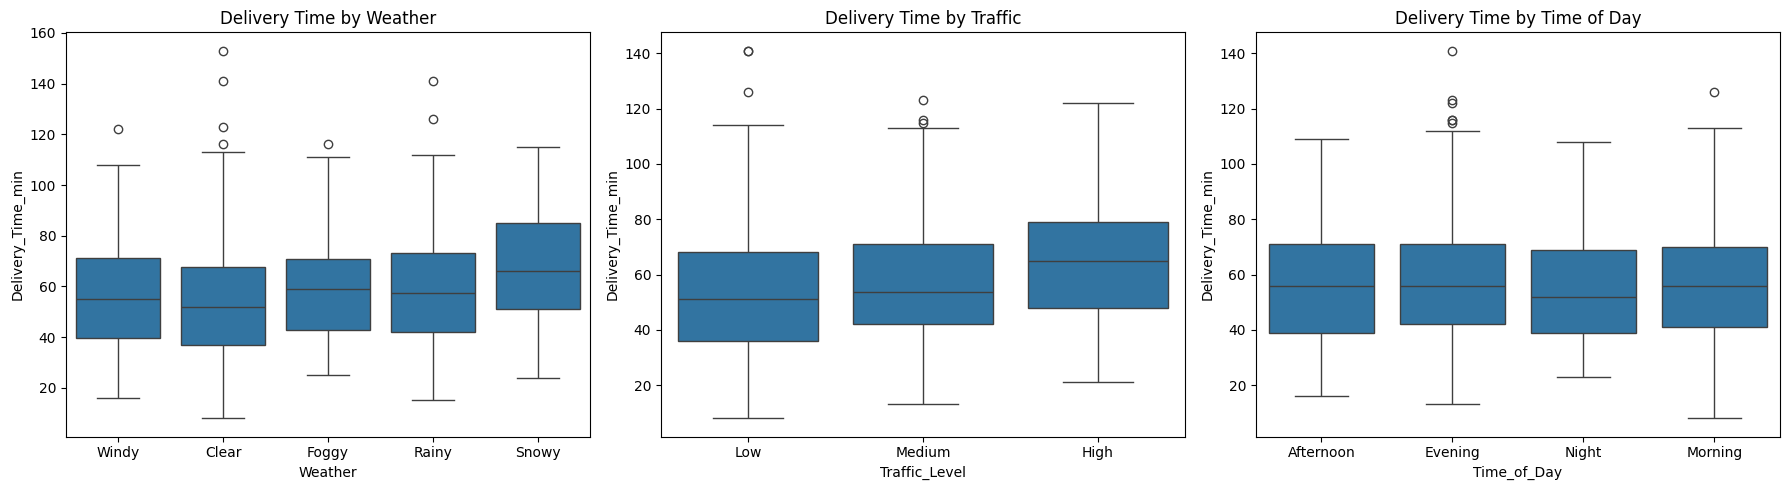

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='Weather', y='Delivery_Time_min', data=df, ax=axes[0])
sns.boxplot(x='Traffic_Level', y='Delivery_Time_min', data=df, ax=axes[1])
sns.boxplot(x='Time_of_Day', y='Delivery_Time_min', data=df, ax=axes[2])
axes[0].set_title('Delivery Time by Weather')
axes[1].set_title('Delivery Time by Traffic')
axes[2].set_title('Delivery Time by Time of Day')
plt.tight_layout()
plt.show()


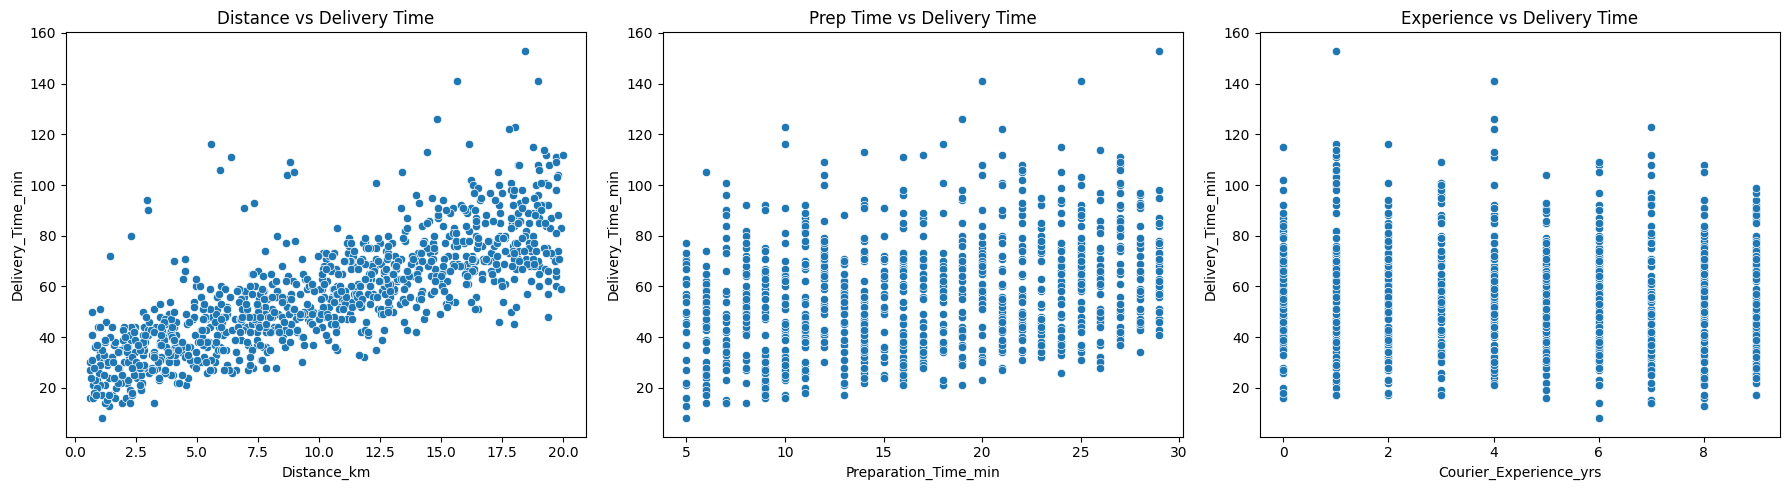

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', data=df, ax=axes[0])
sns.scatterplot(x='Preparation_Time_min', y='Delivery_Time_min', data=df, ax=axes[1])
sns.scatterplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df, ax=axes[2])
axes[0].set_title('Distance vs Delivery Time')
axes[1].set_title('Prep Time vs Delivery Time')
axes[2].set_title('Experience vs Delivery Time')
plt.tight_layout()
plt.show()

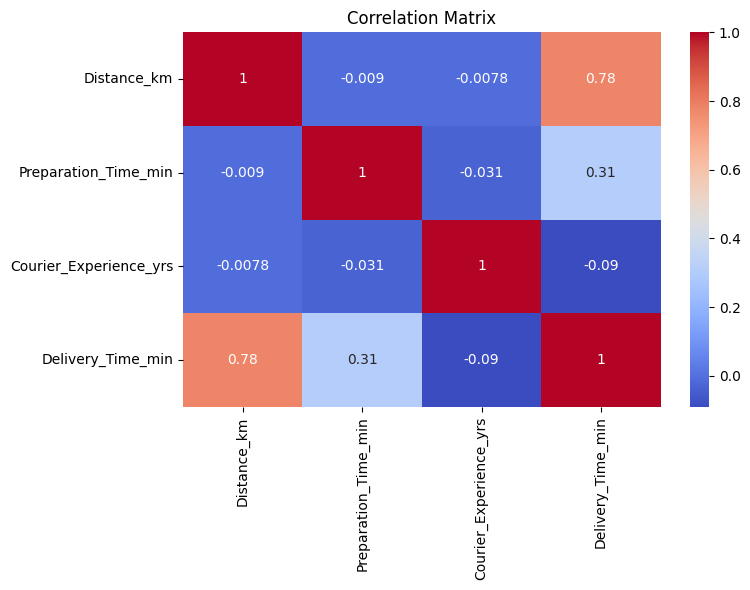

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
